# Titanic - Machine Learning from Disaster. Исследовательский анализ

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-модулей-и-константы" data-toc-modified-id="Импорт-модулей-и-константы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт модулей и константы</a></span></li><li><span><a href="#Настройка-логирования" data-toc-modified-id="Настройка-логирования-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Настройка логирования</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Предварительный-анализ" data-toc-modified-id="Предварительный-анализ-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Предварительный анализ</a></span></li><li><span><a href="#Детальный-анализ-признаков" data-toc-modified-id="Детальный-анализ-признаков-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Детальный анализ признаков</a></span><ul class="toc-item"><li><span><a href="#Pclass" data-toc-modified-id="Pclass-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span><code>Pclass</code></a></span></li><li><span><a href="#Name" data-toc-modified-id="Name-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span><code>Name</code></a></span></li><li><span><a href="#Sex" data-toc-modified-id="Sex-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span><code>Sex</code></a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span><code>Age</code></a></span></li><li><span><a href="#SibSp" data-toc-modified-id="SibSp-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span><code>SibSp</code></a></span></li><li><span><a href="#Parch" data-toc-modified-id="Parch-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span><code>Parch</code></a></span></li><li><span><a href="#Fare" data-toc-modified-id="Fare-4.2.7"><span class="toc-item-num">4.2.7&nbsp;&nbsp;</span><code>Fare</code></a></span></li><li><span><a href="#Cabin" data-toc-modified-id="Cabin-4.2.8"><span class="toc-item-num">4.2.8&nbsp;&nbsp;</span><code>Cabin</code></a></span></li><li><span><a href="#Ticket" data-toc-modified-id="Ticket-4.2.9"><span class="toc-item-num">4.2.9&nbsp;&nbsp;</span><code>Ticket</code></a></span></li><li><span><a href="#Embarked" data-toc-modified-id="Embarked-4.2.10"><span class="toc-item-num">4.2.10&nbsp;&nbsp;</span><code>Embarked</code></a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Импорт модулей и константы

In [1]:
from joblib import load

from matplotlib import pyplot as plt

import pandas as pd

from pandas.plotting import scatter_matrix

import seaborn as sns

from scipy.stats import (
    percentileofscore,
    ttest_ind,
)

from useful_funcs import make_notifier, plot_corr_matrix


SEED = 42


%matplotlib inline

## Настройка логирования

In [2]:
set_notification = make_notifier()

In [3]:
set_notification(
    "EDA. Titanic - Machine Learning from Disaster\n\nМодули импортированы."
    "\nЛогирование настроено."
)

## Загрузка данных
Загрузим тренировочный набор данных. Далее будем работать с этим набором данных.

In [4]:
X_train, y_train = load("train_set.joblib")

In [5]:
set_notification("Выполнена загрузка данных.")

## Исследовательский анализ

### Предварительный анализ

Распечатаем описательные статистики для числовых признаков

In [6]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000
mean,444.405899,2.308989,29.807687,0.492978,0.390449,31.819826
std,257.465527,0.833563,14.485211,1.060720,0.838134,48.059104
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,439.500000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,667.250000,3.000000,39.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


В таблицу попал категориальный признак `Pclass` рассмотрим его отдельно

In [7]:
X_train[["Pclass"]].astype("object").describe()

,Pclass
count,712
unique,3
top,3
freq,391


Выведем описательные статистики для столбцов с типом `object`.

In [8]:
X_train.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,712,712,712,160,710
unique,712,2,571,127,3
top,"Lam, Mr. Ali",male,1601,G6,S
freq,1,459,6,4,516


Признак `PassengerID` - уникальный идентификатор пассажира, он не несёт никакой информации. 

Признаки `Name` и `Ticket` имеют слишком большое количество уникальных значений и, скорее всего, не помогут нам. Однако, из признака `Name` можно извлечь титул, который принадлежал человеку, нёс информацию о его социально-экономическом положении и, чисто теоретически, мог влиять на шанс выжить. Из признака `Ticket` можно попробовать извлечь пользу, если предположить, что для пассажиров, которые путешествовали вместе, например одной семьи, этот признак имеет одинаковые значения. Таким образом, попробуем заменить значения признака `Ticket` количеством их повторений.

Признак `Cabin` содержит большое количество пропущенных значений, тем не менее, можно попробовать предположить, что номер каюты известен для выживших пассажиров. Также интересно, что значения этого признака содержат буквы, которые, возможно, обозначали палубы. Таким образом, для пассажиров, для которых значение этого признака неизвестно, будем указывать `'unknown'`, для остальных - первую букву из значения этого признака.

Выведем гистограммы потенциально полезных количественных признаков.

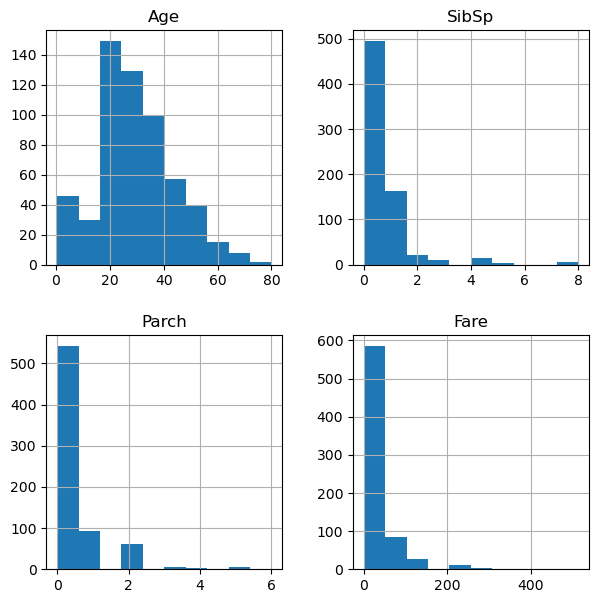

In [9]:
num_columns = ["Age", "SibSp", "Parch", "Fare"]

X_train[num_columns].hist(figsize=(7, 7))
plt.show()

Распределение пассажиров по возрастам  близко к нормальному, остальные по форме далеки от нормального распределения. Также признаки имеют очень разные масштабы.

Проверим наличие корреляции между количественными признакми.

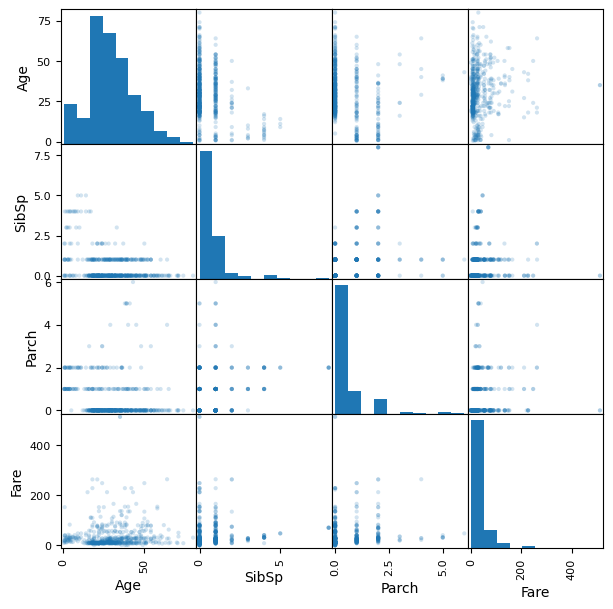

In [10]:
scatter_matrix(
    X_train[num_columns],
    figsize=(7, 7),
    alpha=0.2,
)

plt.show()

Построим матрицу корреляции

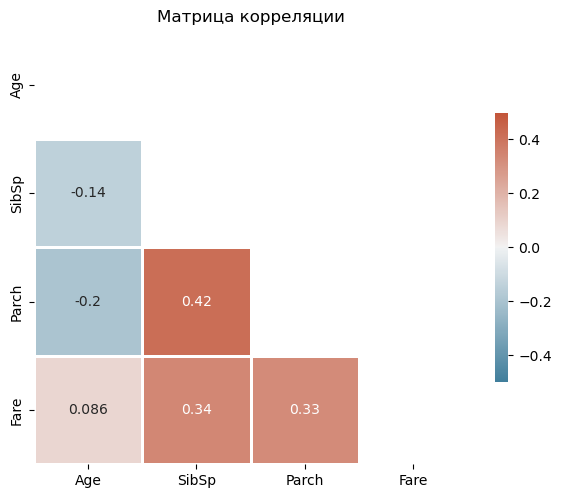

In [11]:
plot_corr_matrix(X_train[num_columns], vmin=-0.5, vmax=0.5, method="kendall")

Наблюдается небольшая отрицательная корреляция между признакми `Parch` и `SibSp`.

### Детальный анализ признаков
Рассмотрим каждый признак по отдельности, чтобы найти перспективные преобразования для них и выявить аномалии в данных. Признаки `PassengerId` и `Ticket` рассматривать не будем.

Для этого снова присоединим к набору целевой признак и присвоем их переменной `exploratory_set`.

In [12]:
exploratory_set = pd.concat([X_train, y_train], axis="columns")
exploratory_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
692,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0
527,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1


#### `Pclass`
Посчитаем количество пассажиров для каждого класса билета.

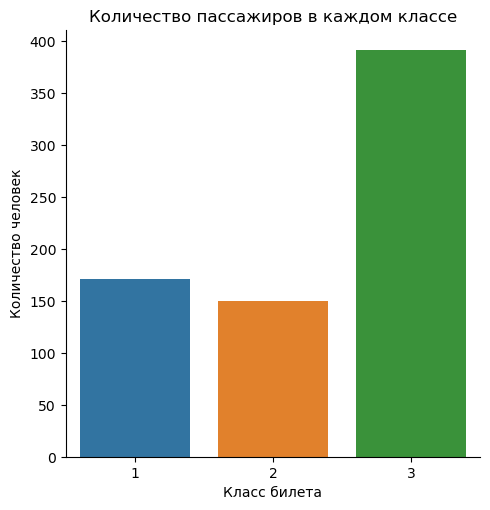

In [13]:
sns.catplot(data=exploratory_set, x="Pclass", kind="count")

plt.title("Количество пассажиров в каждом классе")
plt.xlabel("Класс билета")
plt.ylabel("Количество человек")

plt.show()

Больше всего пассажиров находились в третьем классе.

Оценим долю выживших для каждого класса.

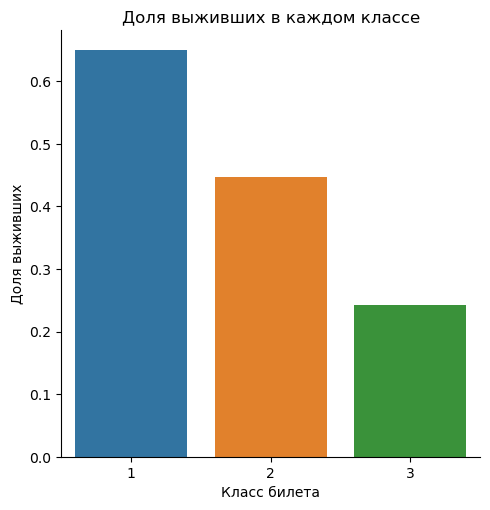

In [14]:
sns.catplot(
    data=exploratory_set, x="Pclass", y="Survived", kind="bar", errorbar=None
)

plt.title("Доля выживших в каждом классе")
plt.xlabel("Класс билета")
plt.ylabel("Доля выживших")

plt.show()

Самая высока смертность была среди пассажиров третьего класса, возможно, это было связано с тем, что их каюты находились дальше всего от спасательных шлюпок.

Оценим долю выживших для каждого класса в разрезе полов.

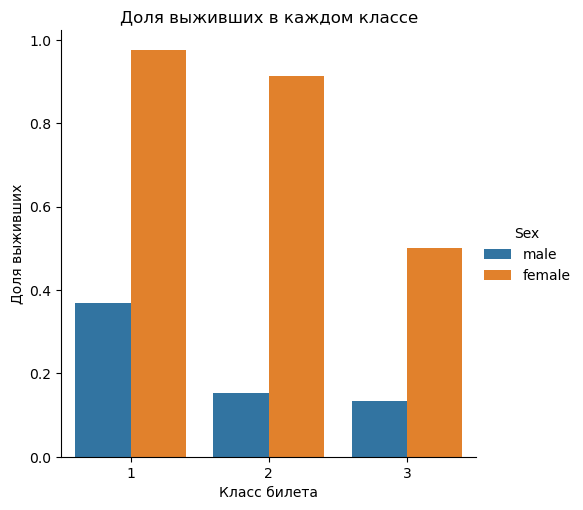

In [15]:
sns.catplot(
    data=exploratory_set,
    x="Pclass",
    y="Survived",
    hue="Sex",
    kind="bar",
    errorbar=None,
)

plt.title("Доля выживших в каждом классе")
plt.xlabel("Класс билета")
plt.ylabel("Доля выживших")

plt.show()

Таким образом, в каждом классе выжило больше женщин, чем мужчин. Самая высокая смертность была среди мужчин третьего класса.

#### `Name`
Имена пассажиров, как мы заметили в предварительном анализе, все уникальны. Однако, они содержат титул, который может указывать на социально-экономический статус пассажира и может быть связан с шансами выжить в кораблекружении.

Выведем первые 5 значений признака `Name`.

In [16]:
exploratory_set[["Name"]].head()

,Name
692,"Lam, Mr. Ali"
481,"Frost, Mr. Anthony Wood ""Archie"""
527,"Farthing, Mr. John"
855,"Aks, Mrs. Sam (Leah Rosen)"
801,"Collyer, Mrs. Harvey (Charlotte Annie Tate)"


Выделим новый признак `Title` (титул) и добиви его к `exploratory_set`, затем выведем первые 5 строк получившегося датафрейма.

In [17]:
exploratory_set["Title"] = exploratory_set.Name.str.extract(
    pat=r"\b,\s(.+?)\.\s[\b(]?", expand=True
)
exploratory_set["Title"] = exploratory_set["Title"].str.lower()
exploratory_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
692,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1,mr
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0,mr
527,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0,mr
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1,mrs
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1,mrs


Посчитаем описательные статистики для нового признака.

In [18]:
exploratory_set[["Title"]].describe()

,Title
count,712
unique,14
top,mr
freq,412


Определим количество повторений каждого титула в наборе данных.

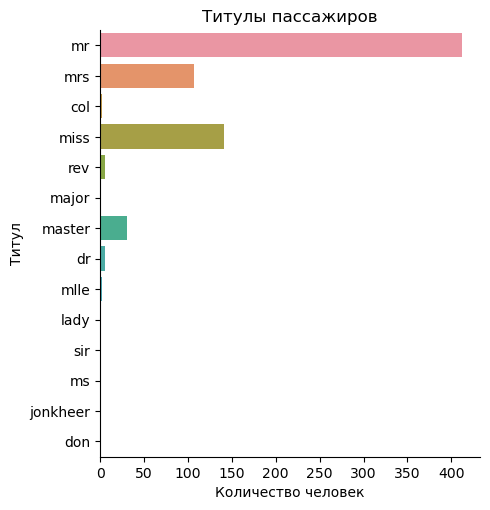

Title
mr          412
miss        141
mrs         107
master       31
dr            6
rev           5
col           2
mlle          2
major         1
lady          1
sir           1
ms            1
jonkheer      1
don           1
Name: count, dtype: int64

In [19]:
sns.catplot(data=exploratory_set, y="Title", kind="count")

plt.title("Титулы пассажиров")
plt.xlabel("Количество человек")
plt.ylabel("Титул")

plt.show()

display(exploratory_set.Title.value_counts(dropna=False)) # noqa: F821

Обращение *master* в то время использовалось по отношению к младенцам мужского пола. Также признак содержит несколько редко встречающихся титулов. Выведем их, затем вынесем в отдельный список `aristocratic_titles`.

In [20]:
pd.DataFrame(exploratory_set.Title.value_counts()).query("count < 10")

,count
Title,
dr,6
rev,5
col,2
mlle,2
major,1
lady,1
sir,1
ms,1
jonkheer,1


In [21]:
aristocratic_titles = pd.DataFrame(exploratory_set.Title.value_counts()).query(
    "count < 10"
)
display(aristocratic_titles) # noqa: F821

aristocratic_titles = list(aristocratic_titles.index)

,count
Title,
dr,6
rev,5
col,2
mlle,2
major,1
lady,1
sir,1
ms,1
jonkheer,1


Заменим их значением *aristocratic* (аристократический).

In [22]:
exploratory_set.loc[
    exploratory_set.Title.isin(aristocratic_titles), "Title"
] = "aristocratic"

Посмотрим как владельцы разных титулов были распределены по классам билетов.

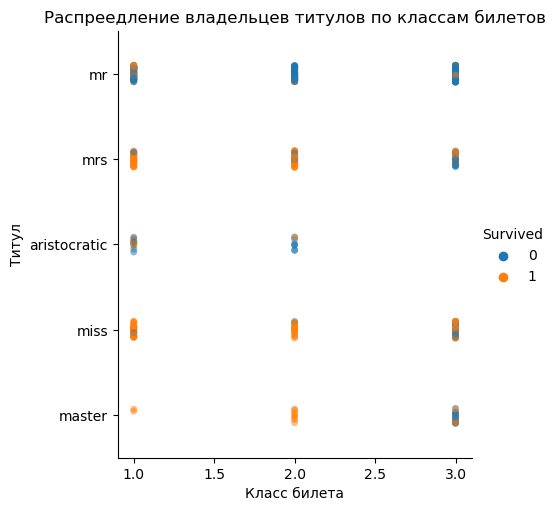

In [23]:
sns.catplot(
    data=exploratory_set,
    y="Title",
    x="Pclass",
    hue="Survived",
    orient="h",
    alpha=0.5,
)

plt.title("Распреедление владельцев титулов по классам билетов")
plt.xlabel("Класс билета")
plt.ylabel("Титул")

plt.show()

Владельцы аристократических титулов занимали только первый и второй класс.

Оценим долю выживших для каждого титула. Также просматривается некоторая связь между титулом, классом и долей выживших.

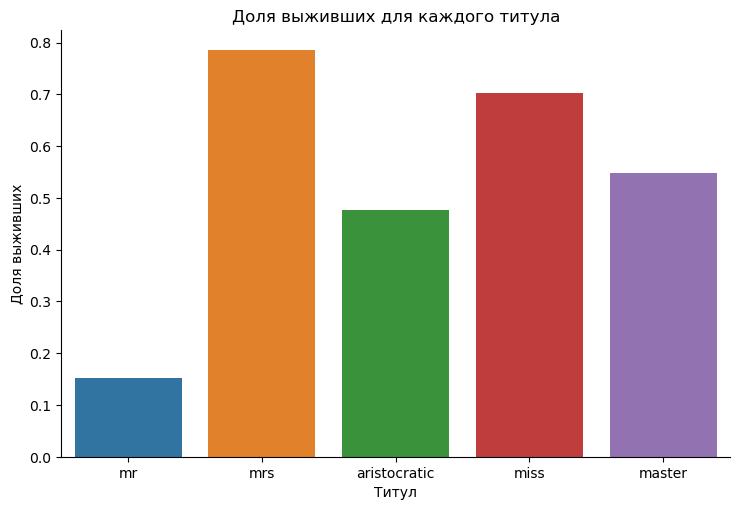

In [24]:
sns.catplot(
    data=exploratory_set,
    x="Title",
    y="Survived",
    kind="bar",
    errorbar=None,
    aspect=1.5,
)

plt.title("Доля выживших для каждого титула")
plt.xlabel("Титул")
plt.ylabel("Доля выживших")

plt.show()

По смотрим ту же метрику в разрезе полов.

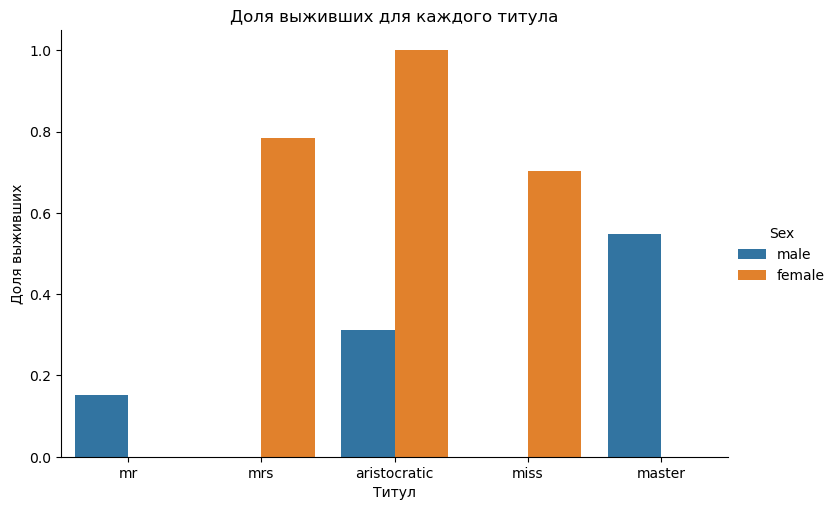

In [25]:
sns.catplot(
    data=exploratory_set,
    x="Title",
    y="Survived",
    hue="Sex",
    kind="bar",
    errorbar=None,
    aspect=1.5,
)

plt.title("Доля выживших для каждого титула")
plt.xlabel("Титул")
plt.ylabel("Доля выживших")

plt.show()

Среди мужчин на Титанике аристократы и младенцы имели более высокие шансы спастись.

#### `Sex`
Оценим количество женщин и мужчин, севших на Титаник

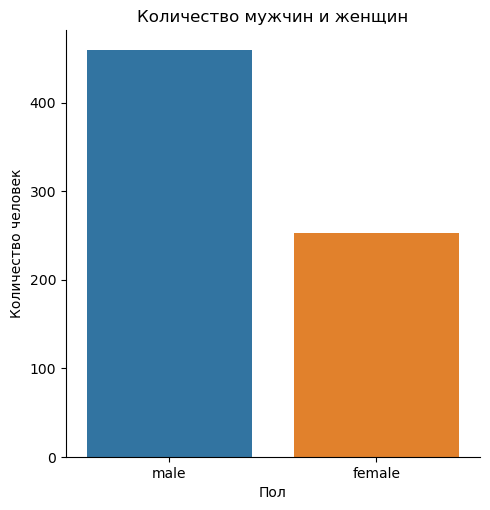

Sex
male      459
female    253
Name: count, dtype: int64

In [26]:
sns.catplot(data=exploratory_set, x="Sex", kind="count")

plt.title("Количество мужчин и женщин")
plt.xlabel("Пол")
plt.ylabel("Количество человек")

plt.show()

display(X_train.Sex.value_counts()) # noqa: F821

Мужчин на титанике было почти в 2 раза больше чем женщин.

Оценим количество выживших пассажиров каждого пола.

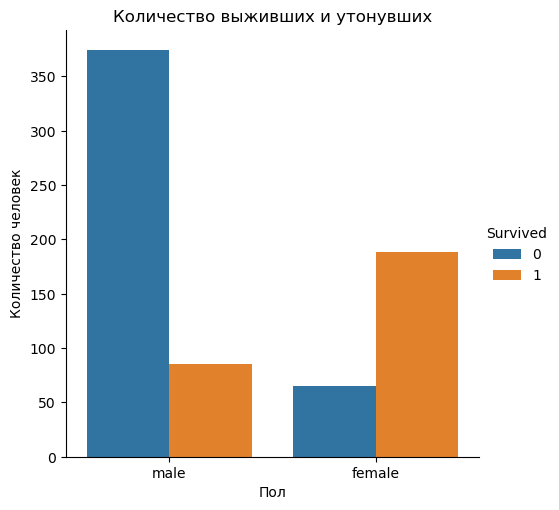

In [27]:
sns.catplot(data=exploratory_set, x="Sex", hue="Survived", kind="count")

plt.title("Количество выживших и утонувших")
plt.xlabel("Пол")
plt.ylabel("Количество человек")

plt.show()

Оценим долю выживших среди мужчин и женщин

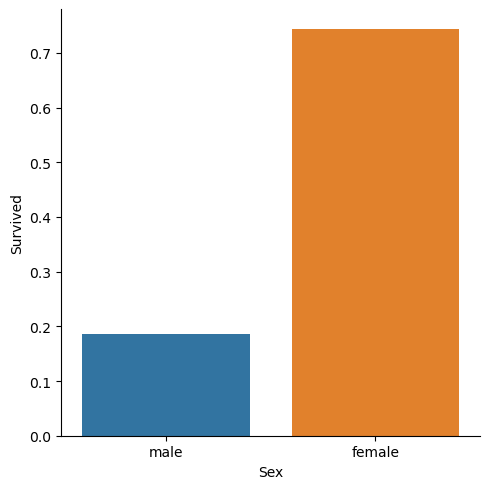

In [28]:
sns.catplot(
    data=exploratory_set, x="Sex", y="Survived", kind="bar", errorbar=None
)
plt.show()

Женщины на Титанике явно имели более высоки шансы выжить, чем мужчины, что согласуется с правилом "Женщины и дети первые", действовавшим в то время.

#### `Age`

Рассмотрим распределение возрастов пассажиров Титаника, для этого построим гистограмму признака `Age`.

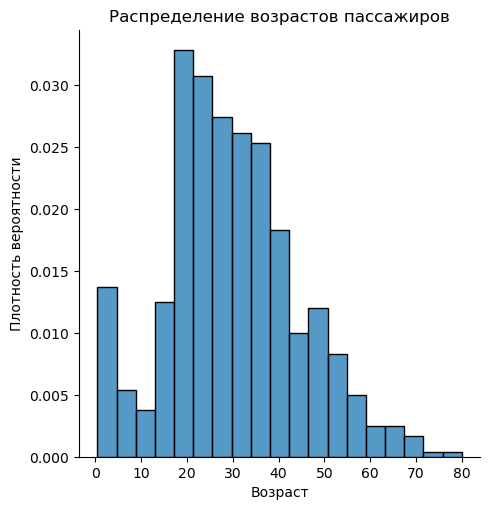

count    575.000000
mean      29.807687
std       14.485211
min        0.420000
25%       21.000000
50%       28.500000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
sns.displot(exploratory_set.Age, stat="density")

plt.xlabel("Возраст")
plt.ylabel("Плотность вероятности")
plt.title("Распределение возрастов пассажиров")

plt.show()

display(exploratory_set.Age.describe()) # noqa: F821

Форма распределения отклоняется от формы нормального.

Проверим гипотезу о том, что выжившие пассажиры моложе погибших. Построим распределение возрастов отдельно для погибших и отдельно для выживших.

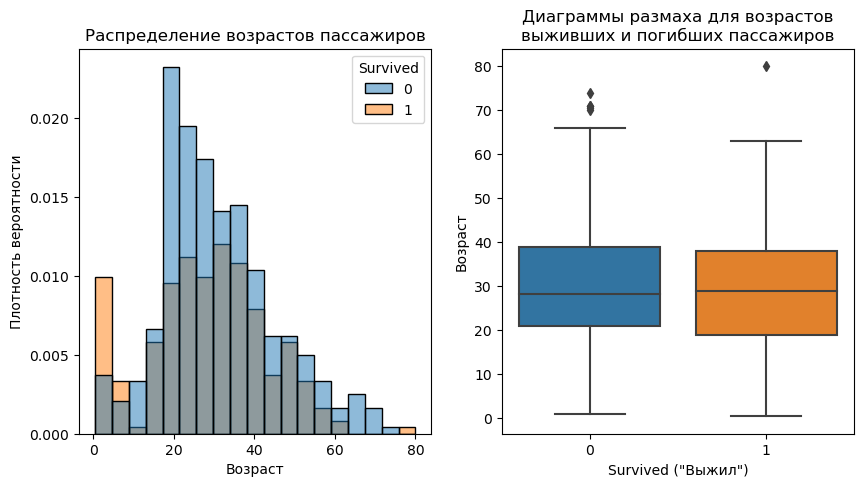

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))


sns.histplot(
    data=exploratory_set, x="Age", stat="density", hue="Survived", ax=ax[0]
)

ax[0].set_xlabel("Возраст")
ax[0].set_ylabel("Плотность вероятности")
ax[0].set_title("Распределение возрастов пассажиров")

sns.boxplot(data=exploratory_set, x="Survived", y="Age", ax=ax[1])

ax[1].set_xlabel('Survived ("Выжил")')
ax[1].set_ylabel("Возраст")
ax[1].set_title(
    "Диаграммы размаха для возрастов\nвыживших и погибших пассажиров"
)

plt.show()

Распределения накладываются друг на друга, а на диаграммах размаха есть незначительное количество выбросов. Пока что не будем убирать выбросы, так как масимальное значение возраста пассажира равно 80 годам, что выглядит реалистично.

Выполним t-тест, чтобы разобраться была ли разница между средним возрастом выживших и средним возрастом погибших пассажиров. Выдвинем следующие нулевую (**H0**) и альтернативную (**H1**) гипотезы:
- **H0** - средний возраст в обеих группах одинаков;
- **H1** - средний возраст групп различается.

Уровень значимости **p** выберем равным **0.95**.

Прежде чем выполнить тест, расчитаем количество наблюдений в каждой группе, среднее значение и стандартное отклонение.

In [31]:
exploratory_set.groupby("Survived").Age.agg(["count", "mean", "std"])

,count,mean,std
Survived,,,
0,342,30.814327,14.121743
1,233,28.330129,14.910473


Выборки имеют разный размер, поэтому установим параметр `equal_var=False` при вызове метода `scipy.stats.ttest_ind()`. 

Также отметим, что средние значения выборок различаются, а стандартные отклонения очень близки, но всё же разные.

Выполним t-тест.

In [32]:
results = ttest_ind(
    exploratory_set.query("Survived == 0").Age.dropna(),
    exploratory_set.query("Survived == 1").Age.dropna(),
    equal_var=False,
)

print(f"p-значение: {results.pvalue:.3f}")

alpha = 0.05

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

p-значение: 0.046
Отвергаем нулевую гипотезу.


Значение $p$ очень близко к пороговму. Законен вопрос мог ли получисться такой результат из-за выбросов?

Удалим выбросы, для этого в выборках оставим только пассажиров моложе 70 лет, и повторно выполним тест. После очистки данных от выбросов выведем диаграммы размаха и результат тестирования гипотезы.

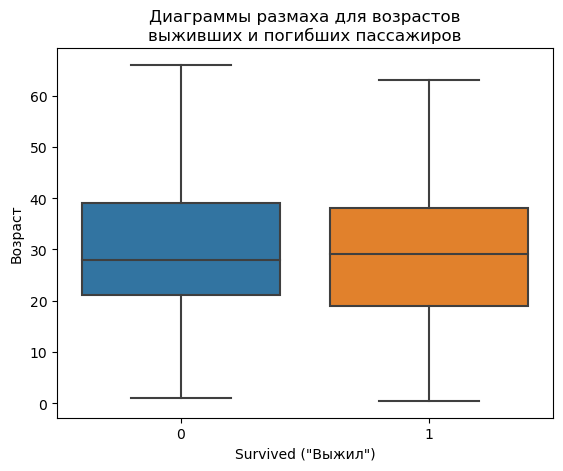

p-значение: 0.080
Не получилось отвергнуть нулевую гипотезу.


In [33]:
sns.boxplot(data=exploratory_set.query("Age < 70"), x="Survived", y="Age")

plt.xlabel('Survived ("Выжил")')
plt.ylabel("Возраст")
plt.title("Диаграммы размаха для возрастов\nвыживших и погибших пассажиров")

plt.show()


results = ttest_ind(
    exploratory_set.query("Survived == 0 and Age < 70").Age.dropna(),
    exploratory_set.query("Survived == 1 and Age < 70").Age.dropna(),
    equal_var=False,
)

print(f"p-значение: {results.pvalue:.3f}")

alpha = 0.05

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Оценим к каком квантилю относится значение 70 (после удаления пропусков).

In [34]:
round(percentileofscore(exploratory_set.Age.dropna(), 70) / 100, 2)

0.99

**Можно подытожить, что у нас нет оснований утверждать, что средний возраст выживших и погибших отличается, или что возраст имел решающее значение при спасении.**

Возраст непрерывная величина, но мы имеем дело с задачей классификации. Может быть целесообразным разбить всех пассажиров на на возрастные группы. В группы с более высокими номерами будем относить пассажиров, которые старше. При этом для дискретизации будем использовать функцию `pd.qcut()`, чтобы в каждой группе оказалось приблизительно одинаковое количество значений.

In [35]:
exploratory_set["AgeGroup"] = pd.qcut(
    exploratory_set.Age, q=4, labels=list(range(4))
)

Проверим количество пассажиров в каждой возрастной групе.

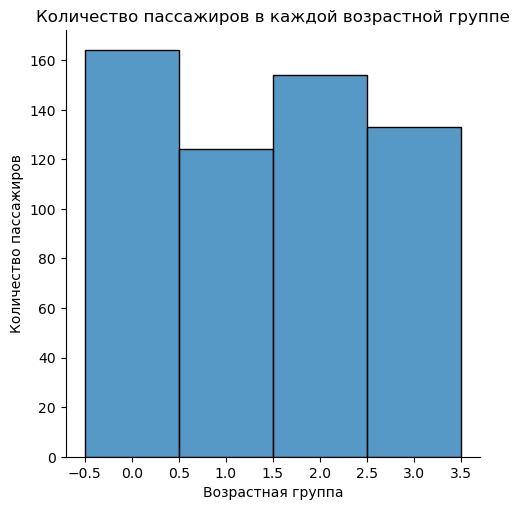

In [36]:
sns.displot(exploratory_set, x="AgeGroup", kind="hist")

plt.title("Количество пассажиров в каждой возрастной группе")
plt.xlabel("Возрастная группа")
plt.ylabel("Количество пассажиров")

plt.show()

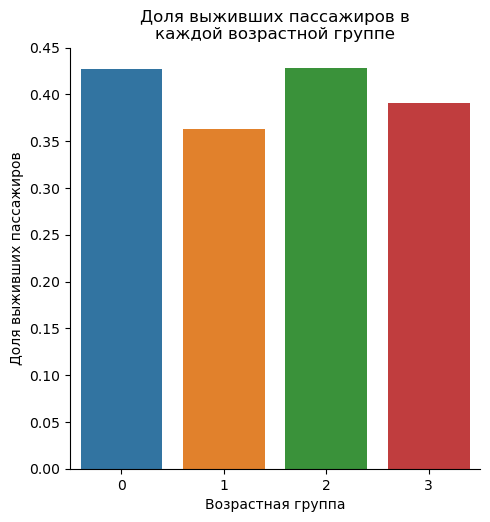

In [37]:
sns.catplot(
    data=exploratory_set, x="AgeGroup", y="Survived", kind="bar", errorbar=None
)

plt.title("Доля выживших пассажиров в\nкаждой возрастной группе")
plt.xlabel("Возрастная группа")
plt.ylabel("Доля выживших пассажиров")

plt.show()

Ярко выраженной зависимости не наблюдается.

#### `SibSp`

Рассмотрим как распределены значения атрибута `SibSp`.

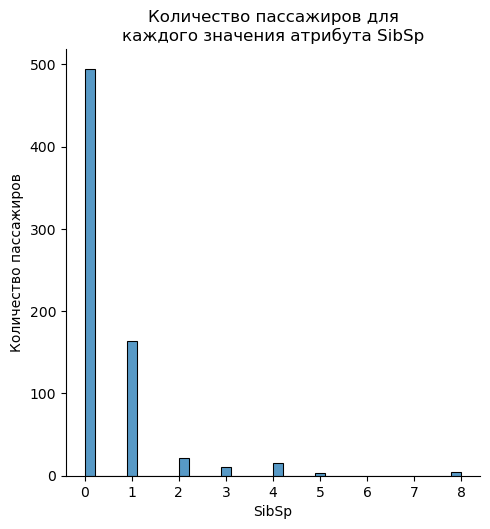

In [38]:
sns.displot(data=exploratory_set, x="SibSp", kind="hist")

plt.title("Количество пассажиров для\nкаждого значения атрибута SibSp")
plt.ylabel("Количество пассажиров")

plt.show()

Оценим долю выживших для каждого значения атрибута `SibSp`.

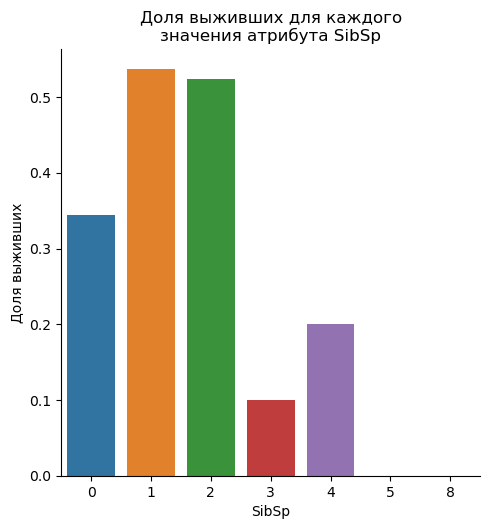

In [39]:
sns.catplot(
    data=exploratory_set, x="SibSp", y="Survived", kind="bar", errorbar=None
)

plt.title("Доля выживших для каждого\nзначения атрибута SibSp")
plt.ylabel("Доля выживших")

plt.show()

#### `Parch`

Рассмотрим как распределены значения атрибута `Parch`.

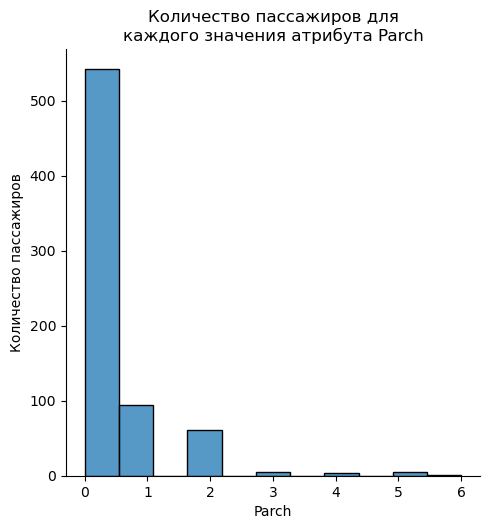

In [40]:
sns.displot(exploratory_set, x="Parch", kind="hist")

plt.title("Количество пассажиров для\nкаждого значения атрибута Parch")
plt.ylabel("Количество пассажиров")

plt.show()

Оценим долю выживших для каждого значения атрибута `Parch`.

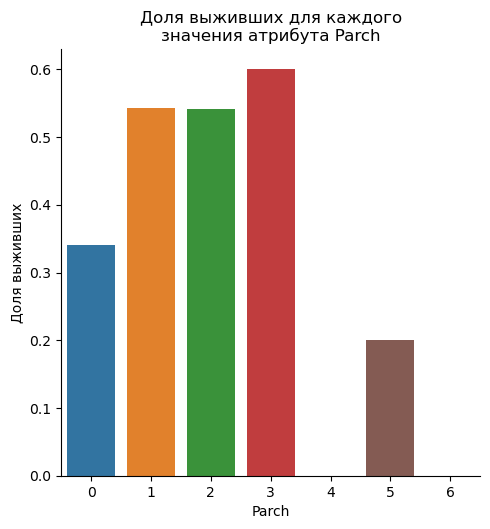

In [41]:
sns.catplot(
    data=exploratory_set, x="Parch", y="Survived", kind="bar", errorbar=None
)

plt.title("Доля выживших для каждого\nзначения атрибута Parch")
plt.ylabel("Доля выживших")

plt.show()

Перспективной может оказаться идея добавить атрибут `Family`, я вляющийся суммой атрибутов `Parch` и `SibSp`.

In [42]:
exploratory_set["Family"] = exploratory_set.Parch + exploratory_set.SibSp

Построим гистограмму признака `Family`.

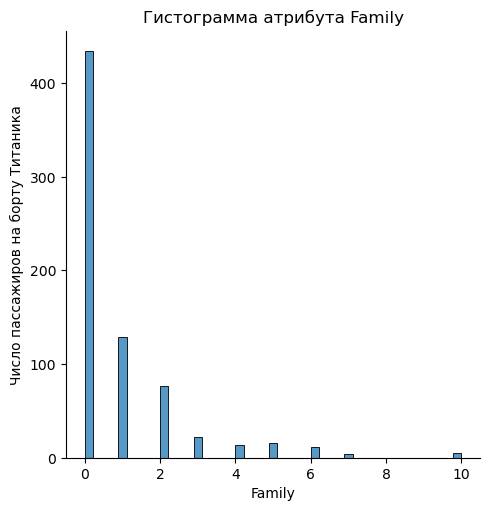

In [43]:
g = sns.displot(data=exploratory_set, x="Family", kind="hist")

plt.ylabel("Число пассажиров на борту Титаника")
plt.title("Гистограмма атрибута Family")

plt.show()

Изучим долю выживших для каждого значения атрибута `Family`

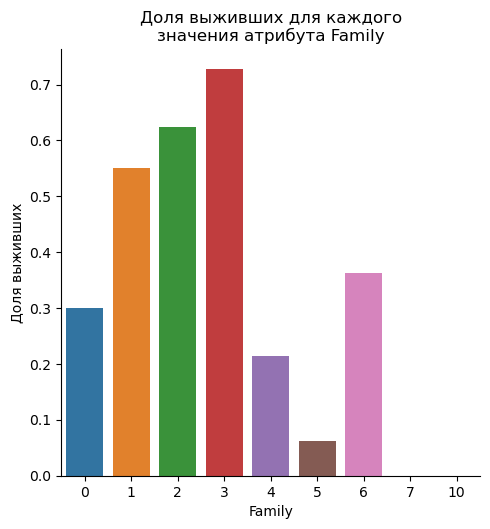

In [44]:
sns.catplot(
    data=exploratory_set, x="Family", y="Survived", kind="bar", errorbar=None
)

plt.title("Доля выживших для каждого\nзначения атрибута Family")
plt.ylabel("Доля выживших")

plt.show()

Также можно попробовать добавить атрибут `isFamily`, который будет равен 1, если пассажир путешествовал с семьёй (если атрибут `Family` больше 0) и в противном случае равен 0.

In [45]:
exploratory_set["isFamily"] = exploratory_set.Family.clip(lower=0, upper=1)

Проверим сколько человек на Титанике путешествовали с семьёй.

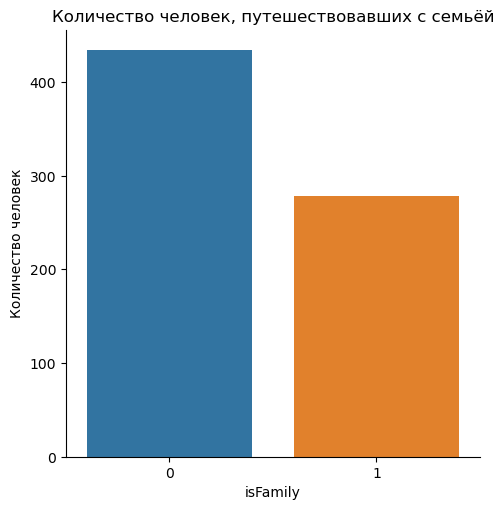

In [46]:
sns.catplot(data=exploratory_set, x="isFamily", kind="count")

plt.title("Количество человек, путешествовавших с семьёй")
plt.ylabel("Количество человек")

plt.show()

Изучим долю выживших в обеих группах.

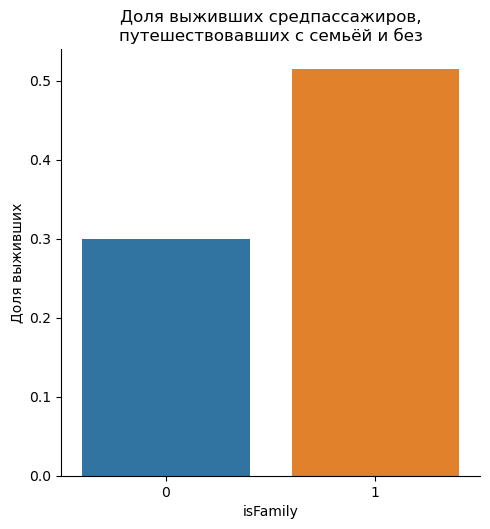

In [47]:
sns.catplot(
    data=exploratory_set, x="isFamily", y="Survived", kind="bar", errorbar=None
)

plt.title("Доля выживших средпассажиров,\nпутешествовавших с семьёй и без")
plt.ylabel("Доля выживших")

plt.show()

#### `Fare`

Проверим нет ли связи между стоимостью билета и шансом выжить в кораблекрушении. 

Сначала построим гистограмму атрибута `Fare`.

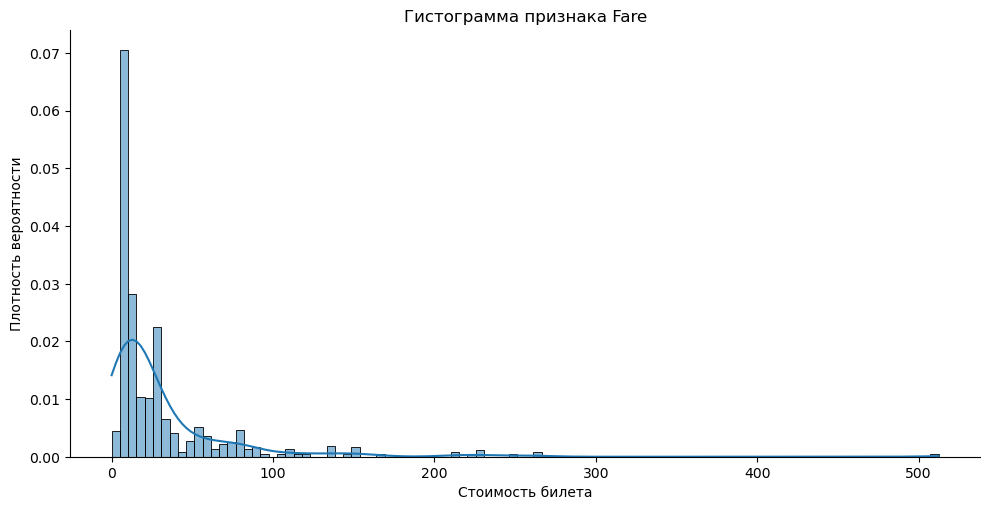

In [48]:
sns.displot(data=exploratory_set, x="Fare", stat="density", aspect=2, kde=True)

plt.title("Гистограмма признака Fare")
plt.xlabel("Стоимость билета")
plt.ylabel("Плотность вероятности")

plt.show()

Распределение имеет "очень тяжёлый хвост".

Посмотрим как распределена стоимость билетов взависимости от класса.

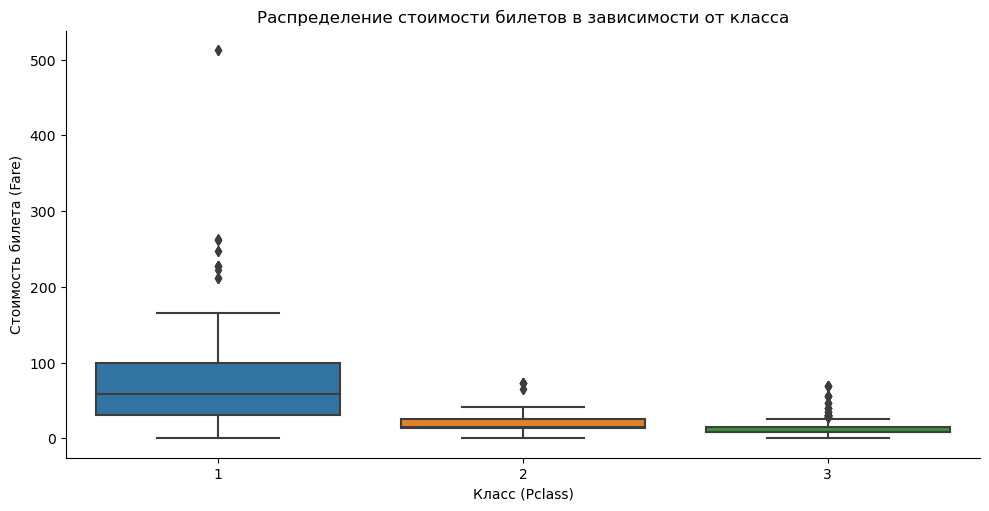

In [49]:
sns.catplot(data=exploratory_set, y="Fare", x="Pclass", aspect=2, kind="box")

plt.title("Распределение стоимости билетов в зависимости от класса")
plt.xlabel("Класс (Pclass)")
plt.ylabel("Стоимость билета (Fare)")

plt.show()

Посмотрим есть ли разница между стомостями билетов погибших и выживших для каждого класса.

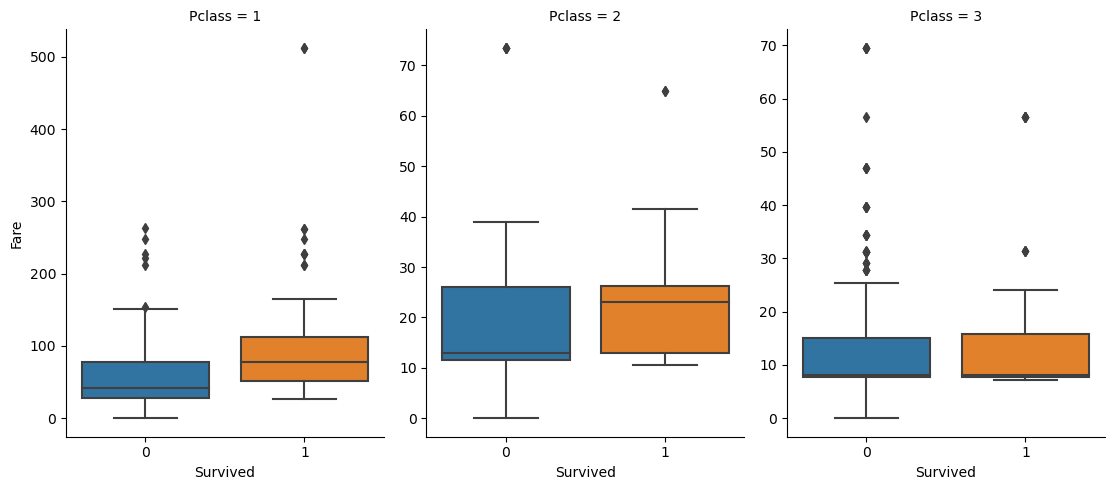

In [50]:
sns.catplot(
    data=exploratory_set,
    y="Fare",
    x="Survived",
    col="Pclass",
    sharey=False,
    kind="box",
    aspect=0.75,
)

plt.show()

Явной зависимости не просмативается.

Можно попробовать дискретизировать признак `Fare` аналогично тому как это было сделано с признакоа `Age`.

In [51]:
exploratory_set["FareGroup"] = pd.qcut(exploratory_set.Fare, 4, labels=range(4))

Оценим долю выживших в каждой группе признака `FareGroup`.

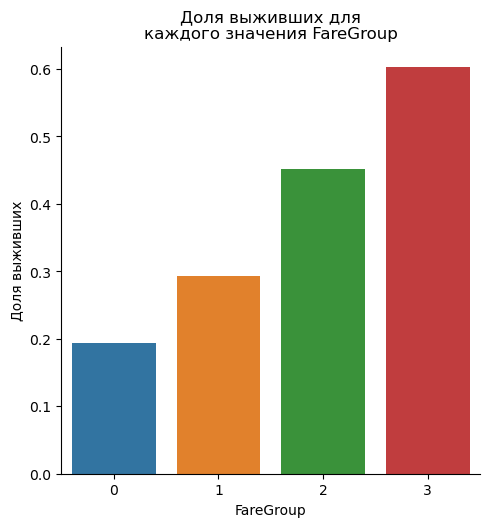

In [52]:
sns.catplot(
    data=exploratory_set, x="FareGroup", y="Survived", kind="bar", errorbar=None
)

plt.title("Доля выживших для\nкаждого значения FareGroup")
plt.ylabel("Доля выживших")

plt.show()

Похоже, пассажиры с более дорогими билетами имели лучшие шансы спастись.

#### `Cabin`

Как было отмечено ранее признка `Cabin` (номер каюты) содержит слишком большое количество уникальных значений и пропусков.

In [53]:
print(
    f"Признак Cabin содержит {exploratory_set.Cabin.nunique()}"
    "уникальных значений."
)
print(f"Признак Cabin содержит {exploratory_set.Cabin.isna().sum()} пропусков.")

Признак Cabin содержит 127уникальных значений.
Признак Cabin содержит 552 пропусков.


Попробуем создать обработать его: пропущенные значения будем заменять значением `'unknown'`, а известные - их первой буквой.

In [54]:
exploratory_set["Cabin"] = exploratory_set.Cabin.str.slice(stop=1)
exploratory_set.loc[exploratory_set.Cabin.isna(), "Cabin"] = "unknown"

Cabin
unknown    552
C           41
B           34
E           29
D           26
A           14
F           11
G            4
T            1
Name: count, dtype: int64

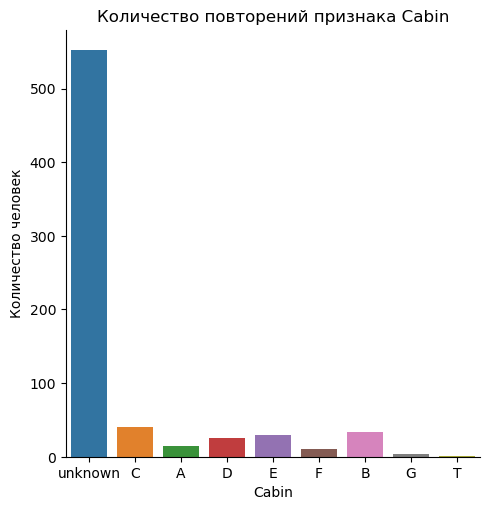

In [55]:
display(exploratory_set["Cabin"].value_counts()) # noqa: F821

sns.catplot(data=exploratory_set, x="Cabin", kind="count")

plt.title("Количество повторений признака Cabin")
plt.ylabel("Количество человек")

plt.show()

Посмотрим различается ли доля выживших в зависимости от значения признака `Cabin`.

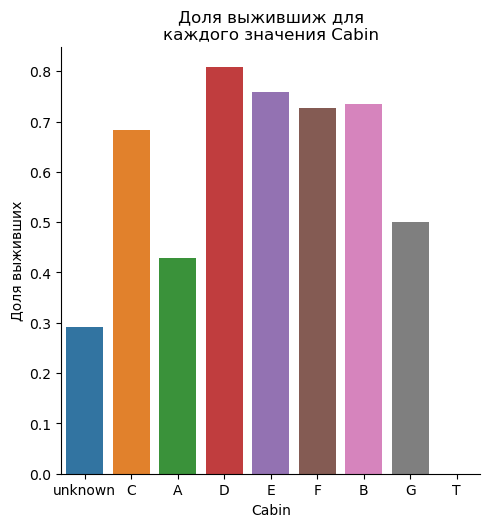

In [56]:
sns.catplot(
    data=exploratory_set, x="Cabin", y="Survived", kind="bar", errorbar=None
)

plt.title("Доля выжившиж для\nкаждого значения Cabin")
plt.ylabel("Доля выживших")

plt.show()

#### `Ticket`
Попробуем обработать значения признака `Ticket`: заменим значения на количество их повторений.

In [57]:
counts = exploratory_set.Ticket.value_counts()
exploratory_set.Ticket = exploratory_set.Ticket.replace(counts)

Ticket
1    476
2    138
3     42
4     24
5     20
6     12
Name: count, dtype: int64

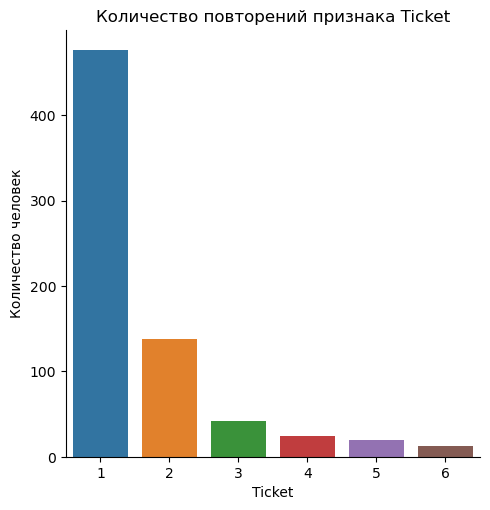

In [58]:
display(exploratory_set["Ticket"].value_counts()) # noqa: F821

sns.catplot(data=exploratory_set, x="Ticket", kind="count")

plt.title("Количество повторений признака Ticket")
plt.ylabel("Количество человек")

plt.show()

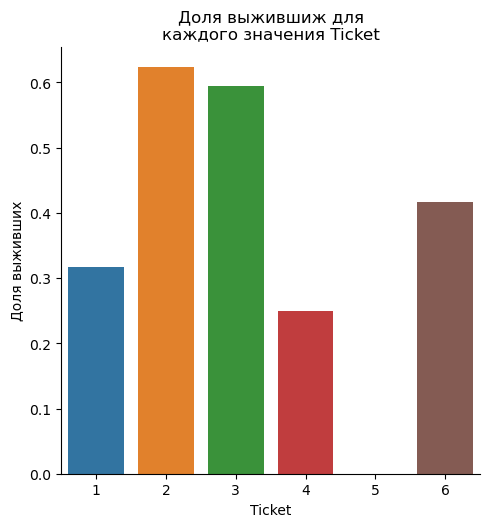

In [59]:
sns.catplot(
    data=exploratory_set, x="Ticket", y="Survived", kind="bar", errorbar=None
)

plt.title("Доля выжившиж для\nкаждого значения Ticket")
plt.ylabel("Доля выживших")

plt.show()

#### `Embarked`

Посмотрим сколько пассажиров село на Титаник в каждом порту.

Embarked
S    516
C    139
Q     55
Name: count, dtype: int64

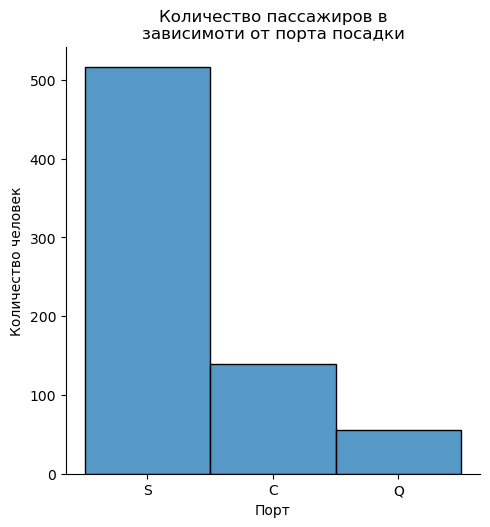

In [60]:
display(exploratory_set.Embarked.value_counts()) # noqa: F821


sns.displot(data=exploratory_set, x="Embarked", kind="hist")

plt.title("Количество пассажиров в\nзависимоти от порта посадки")
plt.xlabel("Порт")
plt.ylabel("Количество человек")

plt.show()

Больше всего человек село на корабль в Саутгемптоне.

Проверим долю выживших в зависимости от значения признака `Embarked`.

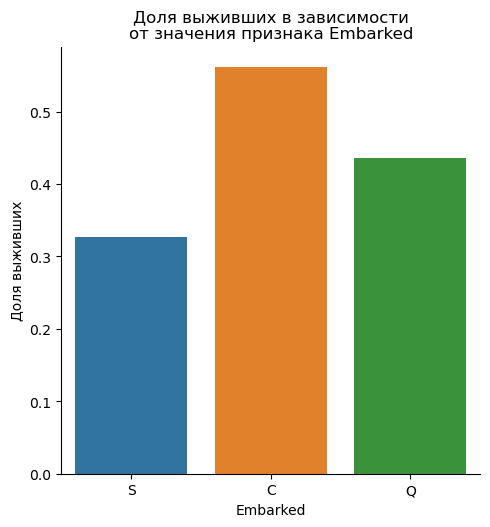

In [61]:
sns.catplot(
    data=exploratory_set, x="Embarked", y="Survived", kind="bar", errorbar=None
)

plt.title("Доля выживших в зависимости\nот значения признака Embarked")
plt.ylabel("Доля выживших")

plt.show()

## Вывод

1. Присутствует дисбаланс классов
1. Требуется кодирование категориальных признаков
1. Требуется удаление неинформативных признаков
1. Требуется обработка пропусков
1. Требуется стандартизация данных
1. К исследовательскому набору были добавлены новые признаки, информативность которых еще предстоит оценить:
    - `Title`
    - `AgeGroup`
    - `Family`
    - `isFamily`
    - `FareGroup`
    - `Cabin`
    - `Ticket`
1. Возможно наличие корреляции между добавленными и имевшимися признаками

На первый взгляд, очень важными признаками являются класс билета `Pclass` и пол `Sex` пассажира. Могут оказаться полезны признаки `Title`, `AgeGroup`, `isFamily`. Возможно, окажутся информативны `FareGroup` и `isCabin`. Проверим это предположение после обработки данных.

Отметим что женщины имели более высокие шансы спастись, чем мужчины, и что в данных нет явных сведений о том, что более молодые пассажиры имели больше шансов выжить, однако, может оказаться, что некоторые возрастные группы имели больше шансов спастись.

In [62]:
set_notification("Выполнен исследовательский анализ данных.")